In [6]:
import numpy as np
import matplotlib.pyplot as plt

https://www.kaggle.com/code/sam1o1/svm-for-cancer-calssification 

In [2]:
import pandas as pd
df = pd.read_csv('cell_samples.csv')

# View dataframe
df
# df.column()
# df.tail()
# df.dtypes
# df.info() 
# df.describe()

# Total elements in df
# df.size

# Num of row and column
# df.shape

# Count of each column
# df.count()

# Count of null values in the entire table 
# df.isnull().sum()

# Count of null values in a perticular column
# df.Class.isnull().sum()

# Count of value in a column
# df.Class.count()

# Describe a column
# df.Class.describe()

# Count of unique value in a column
# df.Class.value_counts()

# Unique value in a column
# df.Class.unique()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
benign_df = df[df.Class==2][0:200]
malignant_df = df[df.Class==4][0:200]

# benign_df

malignant_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
491,1119189,5,8,9,4,3,10,7,1,1,4
493,1142706,5,10,10,10,6,10,6,5,2,4
506,1286943,8,10,10,10,7,5,4,8,7,4
514,1306282,6,6,7,10,3,10,8,10,2,4


<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

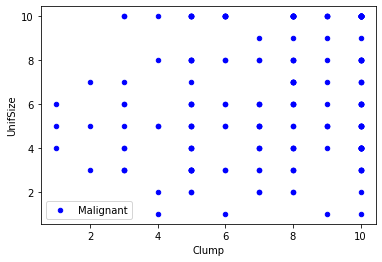

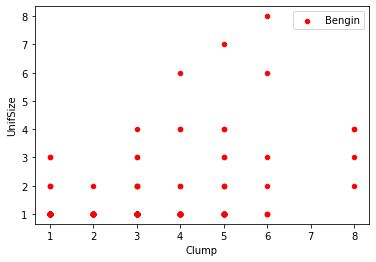

In [4]:
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', c='blue', label='Malignant')
benign_df.plot(kind='scatter', x='Clump', y='UnifSize', c='red', label='Bengin')

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

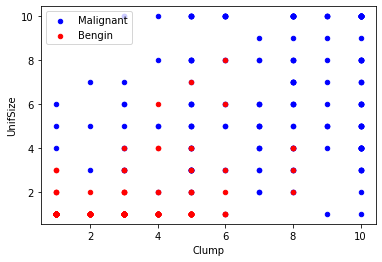

In [5]:
axes = malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', c='blue', label='Malignant')
benign_df.plot(kind='scatter', x='Clump', y='UnifSize', c='red', label='Bengin', ax=axes)

# Data Preprocessing

When there are non-integer values in the 'BareNuc' column of your DataFrame that cannot be converted to integers. To address this issue, you can do the following:

### Identify Non-Numeric Values:

Check the unique values in the 'BareNuc' column to identify any non-numeric values, such as '?'. You can use 

df['BareNuc'].unique() 

to see all unique values.

### Handle or Remove Non-Numeric Values:

Decide how to handle non-numeric values. You might choose to replace them with a specific value (e.g., NaN), impute missing values, or remove rows containing these values.

Replace '?' with NaN (if you want to keep non-numeric values)

df['BareNuc'].replace('?', np.nan, inplace=True)

Convert the column to numeric, treating NaN as numeric

df['BareNuc'] = pd.to_numeric(df['BareNuc'], errors='coerce')

### Impute Missing Values (Optional):

If you replaced non-numeric values with NaN, you might want to impute missing values using techniques such as mean, median, or other imputation methods.

Impute missing values with the mean (for example)

df['BareNuc'].fillna(df['BareNuc'].mean(), inplace=True)

### Convert to Integer:

After handling or removing non-numeric values, attempt to convert the column to integers again. <br>
'coerce': option replaces non-numeric values with NaN. <br>
'raise' (default): Raises an error if it encounters any non-numeric values. <br>
'ignore': Ignores errors and leaves non-numeric values as they are. <br>
'downcast': Tries to downcast the result to the smallest possible numeric dtype. <br>

df = df[pd.to_numeric(df.BareNuc, errors='coerce').notnull()]

Must specify numeric type is int 

df['BareNuc'] = df['BareNuc'].astype('int')


In [7]:
# BareNuc - is non numerical data, we can convert to numeric, remove this column or perform some preprocessing technique like minmax or taking the mean if possible )
# df.dtypes
# df['BareNuc'].unique()

# Convert BareNuc to numeric. The 'coerce' option replaces non-numeric values with NaN
# df = pd.to_numeric(df.BareNuc, errors='coerce') 

#  Convert non null values of BareNuc to numeric
df = df[pd.to_numeric(df.BareNuc, errors='coerce').notnull()]
# df.dtypes

# Must specify numeric type is int 
df.loc[:, 'BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [33]:
# df.columns
# X = df.iloc[:, 1:-1]
# y = df.iloc[:, -1]

# X.columns

# Convert y to a DataFrame
# y = y.to_frame()
# Now you can access the columns attribute for y
# y.columns

# X = X.values
# y = y.values

# X
# y

# ==================================================================================================================

X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# X
# y

# X.shape
# y.shape


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape

(137,)

In [42]:
from sklearn import svm

clf = svm.SVC (kernel = 'linear', C=1, gamma='auto')
clf

SVC(C=1, gamma='auto', kernel='linear')

In [43]:
clf.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [44]:
y_predict = clf.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

